# 1. Setup

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import kagglehub
import shutil
import os
import matplotlib.pyplot as plt

# 2. Prepare dataset

In [16]:
# Download latest version
path = kagglehub.dataset_download("armanakbari/connectionist-bench-sonar-mines-vs-rocks")
dst = "data/sonar"
filename = 'sonar.all-data.csv'
print("File path:", os.path.join(os.path.abspath(dst), filename))
shutil.copytree(path, dst, dirs_exist_ok=True)
data = pd.read_csv(os.path.join(dst, filename), header=None)

File path: /Users/quanghoang/Documents/study/hcmut/master-of-science/subject/machine-learning-and-applications/RandomForest_Coursework/data/sonar/sonar.all-data.csv


In [24]:
# Tách Biến độc lập (X) và Biến phụ thuộc (y)
X = data.iloc[1:, 0:-1]
y = data.iloc[1:, -1]

In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,R
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.015,0.0085,0.0073,0.005,0.0044,0.004,0.0117,R


# 3. Mô tả dữ liệu

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       209 non-null    object
 1   1       209 non-null    object
 2   2       209 non-null    object
 3   3       209 non-null    object
 4   4       209 non-null    object
 5   5       209 non-null    object
 6   6       209 non-null    object
 7   7       209 non-null    object
 8   8       209 non-null    object
 9   9       209 non-null    object
 10  10      209 non-null    object
 11  11      209 non-null    object
 12  12      209 non-null    object
 13  13      209 non-null    object
 14  14      209 non-null    object
 15  15      209 non-null    object
 16  16      209 non-null    object
 17  17      209 non-null    object
 18  18      209 non-null    object
 19  19      209 non-null    object
 20  20      209 non-null    object
 21  21      209 non-null    object
 22  22      209 non-null    ob

- 208 dòng
- 61 cột
- Không có giá trị thiếu
- 60 cột float64, 1 cột object (nhãn)

In [29]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,209,209,209,209,209,209,209,209,209,209,...,209,209,209,209,209,209,209,209,209,209
unique,178,183,191,182,194,197,196,202,206,208,...,145,135,135,130,123,122,125,120,110,3
top,0.0201,0.0523,0.0623,0.0608,0.0647,0.069,0.0771,0.1833,0.0598,0.2354,...,0.0091,0.0129,0.0079,0.0036,0.0054,0.0037,0.0036,0.007,0.0053,M
freq,5,2,2,3,2,2,3,2,2,2,...,5,5,5,5,5,7,6,6,7,111


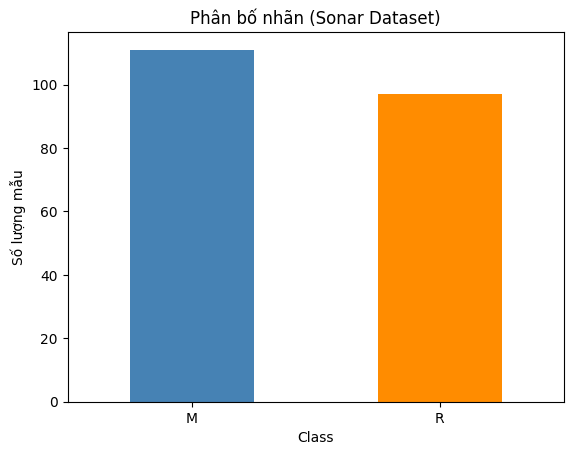

60
M    111
R     97
Name: count, dtype: int64

In [30]:
y.value_counts().plot(kind='bar', color=['steelblue', 'darkorange'])
plt.title("Phân bố nhãn (Sonar Dataset)")
plt.xticks(rotation=0)
plt.xlabel("Class")
plt.ylabel("Số lượng mẫu")
plt.show()

y.value_counts()


In [22]:
# Tiền xử lý (Chuyển đổi nhãn y 'R', 'M' thành 0, 1)
y = y.map({'R': 0, 'M': 1})